<a href="https://colab.research.google.com/github/nakisa84/Springboard/blob/main/capston%202%20project/notebooks/BC_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Survival Prediction Exploratory Data Analysis**

# 1.Introduction

In the last section data wrangling was done by exploring and cleaning the data. Most of the features were categorical and were converted to numeric data using labeling method. Also as the data was imbalanced  SMOTE method used to add some synthetic data and eventually very nice and balanced data was produced.

In this section we will dive deeper to explore the data.


In [1]:
import pandas as pd
import numpy as np
#from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2




# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# data prepration
def prepare_train_test (df,target):
    X = df.drop(target, axis = 1)
    y = df[[target]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    return X_train, X_test, y_train, y_test

# feature selection
def calculate_scores(fs,features):
    features_score = []
    for i in range(len(fs.scores_)):
        features_score.append((features.columns.values[i],fs.scores_[i]))
    # plot the scores
    features_score.sort(key=lambda y: y[1], reverse = True)
    df_scores = pd.DataFrame(features_score, columns =['Name', 'Score'])
    print(df_scores)
    plt.bar([i for i in range(len(df_scores))],df_scores['Score'])
    plt.xticks(rotation=20)
    plt.show()  
    
# count plot the features
def countplot_features(df,ncol):
    count = 0
    for item in df.columns:
      if item != 'Status':
        index = count%ncol
        if index == 0:
          fig, ax = plt.subplots(1,ncol,figsize = (20,5))
        sns.countplot(x=item, hue='Status', data=df, ax=ax[index]);
        count +=1


# 2.Load the data

In [13]:
# loading data in colab environment 
from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Springboard/capston 2 project/data/bc_data_synthetic.csv')

# loading data in Jupyter environment 
#df = pd.read_csv('../data/bc_data_synthetic.csv')

print('shape: ',df.shape)
df.head()

shape:  (6816, 25)


,Tumor Size,Regional Node Examined,Reginol Node Positive,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage_T2,T Stage_T3,T Stage_T4,N Stage_N2,N Stage_N3,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Grade II,Grade_Grade III,Grade_anaplastic,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status
0,40,19,11,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0
1,45,25,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0
2,25,4,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1
3,19,26,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1
4,35,21,5,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Tumor Size                    6816 non-null   int64
 1   Regional Node Examined        6816 non-null   int64
 2   Reginol Node Positive         6816 non-null   int64
 3   Race_Other                    6816 non-null   int64
 4   Race_White                    6816 non-null   int64
 5   Marital Status_Married        6816 non-null   int64
 6   Marital Status_Separated      6816 non-null   int64
 7   Marital Status_Single         6816 non-null   int64
 8   Marital Status_Widowed        6816 non-null   int64
 9   T Stage_T2                    6816 non-null   int64
 10  T Stage_T3                    6816 non-null   int64
 11  T Stage_T4                    6816 non-null   int64
 12  N Stage_N2                    6816 non-null   int64
 13  N Stage_N3                    681

# 3. Explore The Data

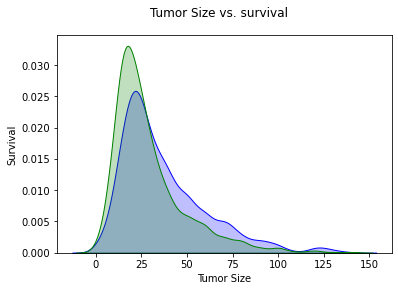

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]["Tumor Size"], shade=True, color="blue", label="did not survive", ax=ax)
sns.kdeplot(df[df["Status"]==0]["Tumor Size"], shade=True, color="green", label="survived", ax=ax)

ax.set_xlabel("Tumor Size")
ax.set_ylabel("Survival")

fig.suptitle("Tumor Size vs. survival");

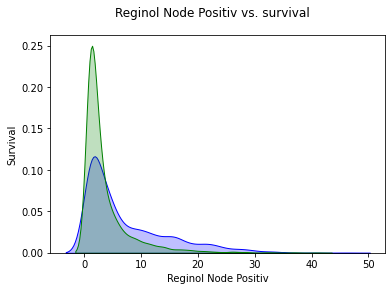

In [26]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]["Reginol Node Positive"], shade=True, color="blue", label="did not survive", ax=ax)
sns.kdeplot(df[df["Status"]==0]["Reginol Node Positive"], shade=True, color="green", label="survived", ax=ax)

ax.set_xlabel("Reginol Node Positiv")
ax.set_ylabel("Survival")

fig.suptitle("Reginol Node Positiv vs. survival");

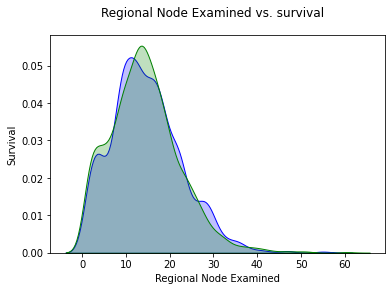

In [27]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]['Regional Node Examined'], shade=True, color="blue", label="did not survive", ax=ax)
sns.kdeplot(df[df["Status"]==0]['Regional Node Examined'], shade=True, color="green", label="survived", ax=ax)

ax.set_xlabel("Regional Node Examined")
ax.set_ylabel("Survival")

fig.suptitle("Regional Node Examined vs. survival");

In [ ]:
df.columns

Index(['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Race_Other', 'Race_White', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single',
       'Marital Status_Widowed', 'T Stage_T2', 'T Stage_T3', 'T Stage_T4',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIB', '6th Stage_IIIA',
       '6th Stage_IIIB', '6th Stage_IIIC', 'Grade_Grade II', 'Grade_Grade III',
       'Grade_anaplastic', 'A Stage_Regional', 'Estrogen Status_Positive',
       'Progesterone Status_Positive', 'Status'],
      dtype='object')

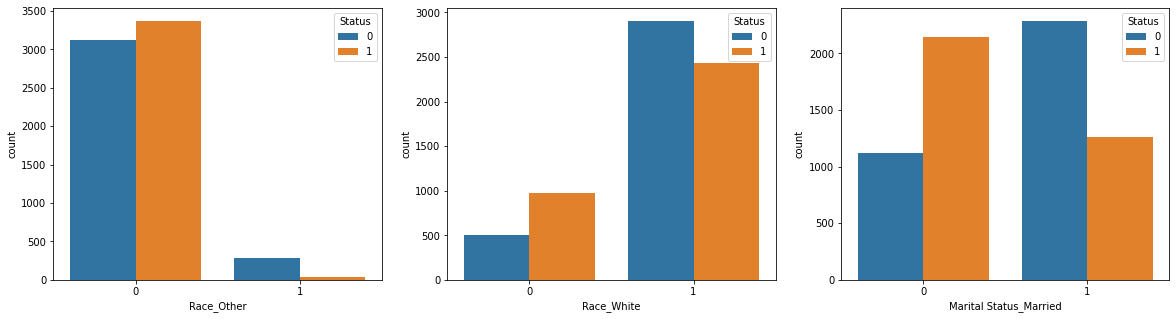

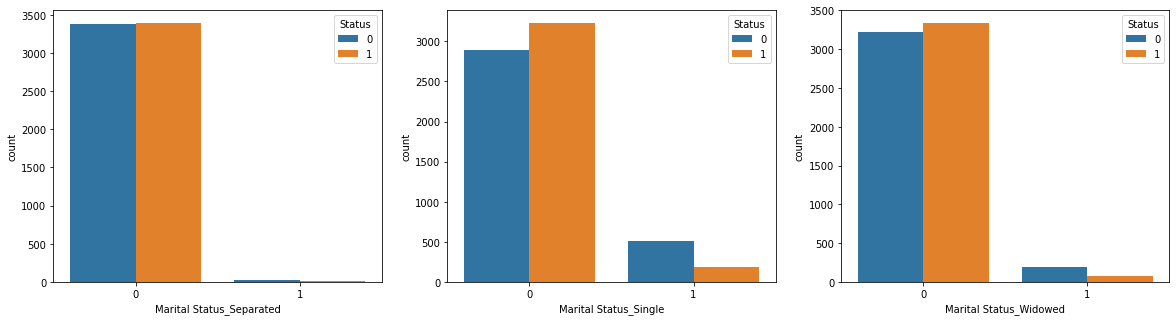

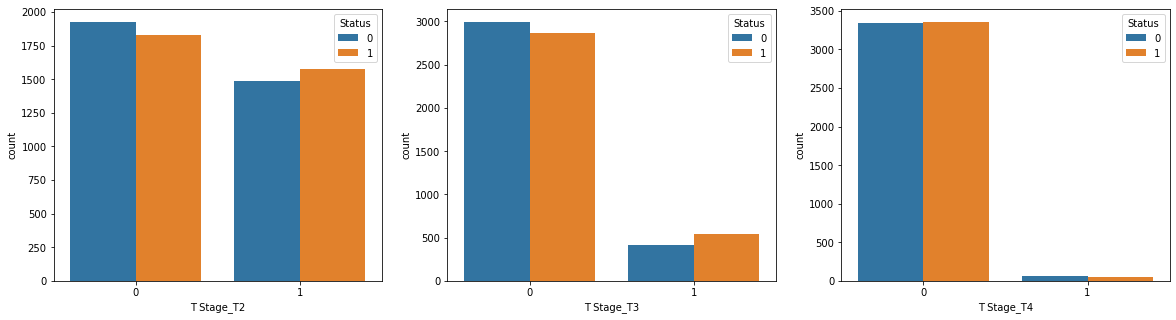

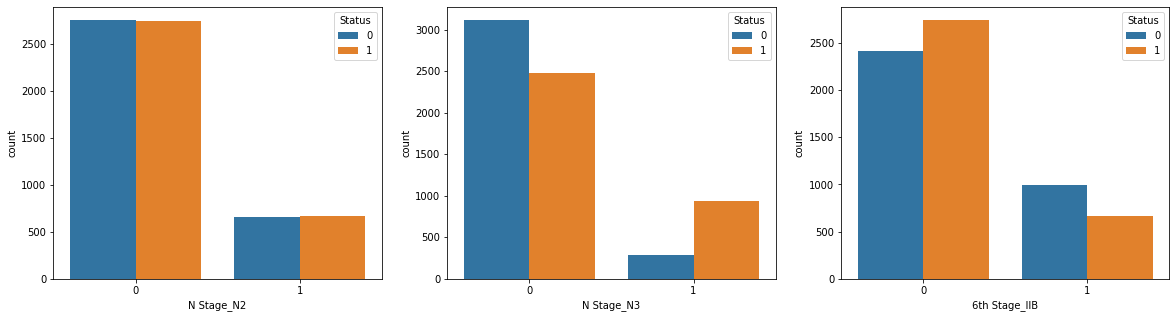

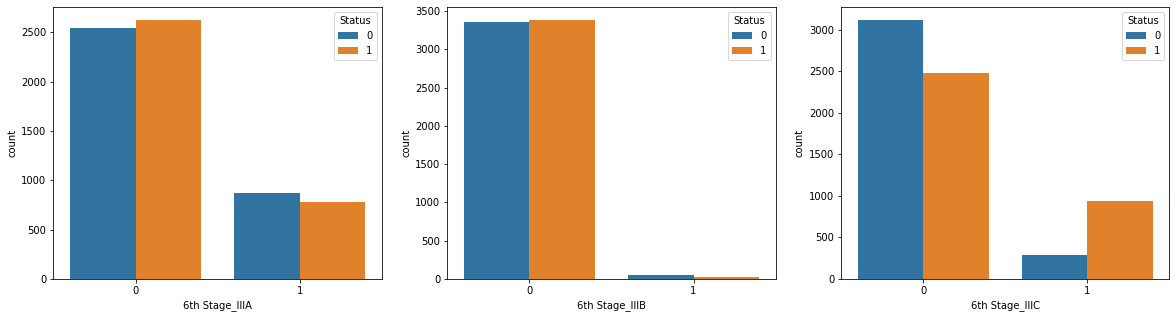

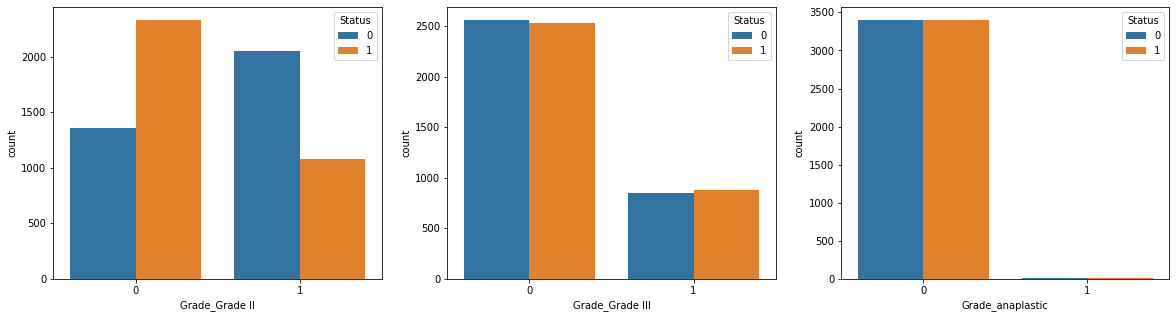

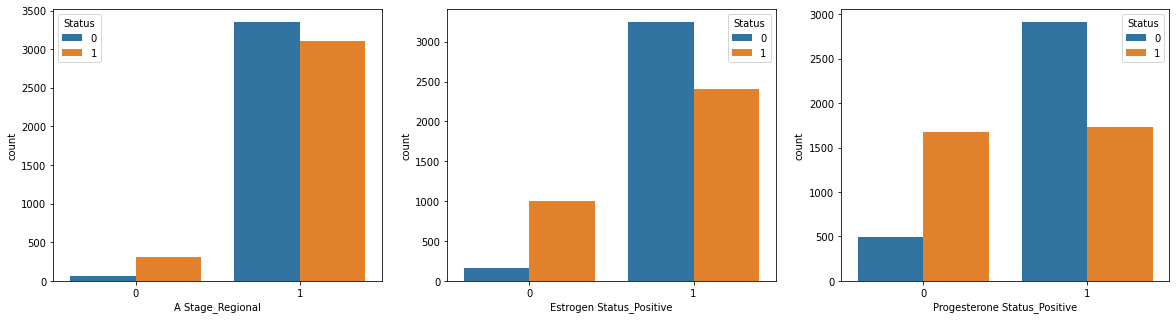

In [28]:
plt.close('all')
countplot_features(df.drop(['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive'],axis = 1),3)

As seen in the above graphs some features show some contributions to the target classificatiosn. For example, maried person could live longer, or people with grade 2 cancer live longer and that could be that their grade is higher and the will not survive so long. Also Being Estrogen or Progestrone positive could lead to a longer life.


# 4. Feature engineering
There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.

They are:

Chi-Squared Statistic.
Mutual Information Statistic. 

In [29]:
# prepare and divide the data to test and train
X_train, X_test, y_train, y_test = prepare_train_test (df,'Status')

# fit the data to the feature selection model
X_train_fs, X_test_fs, fs = select_features(X_train, y_train,X_test)


                            Name        Score
0          Reginol Node Positive  2387.482120
1                     Tumor Size  2256.149186
2                 Grade_Grade II   214.257576
3   Progesterone Status_Positive   211.804549
4                     N Stage_N3   207.955114
5                 6th Stage_IIIC   207.955114
6         Marital Status_Married   187.234955
7          Marital Status_Single   108.514807
8                     Race_Other   107.430971
9       Estrogen Status_Positive    88.191899
10                 6th Stage_IIB    41.944090
11        Marital Status_Widowed    33.527331
12                    Race_White    28.625624
13                    T Stage_T3    12.378595
14        Regional Node Examined     7.516623
15              A Stage_Regional     6.258713
16      Marital Status_Separated     3.418715
17                6th Stage_IIIB     3.143297
18                    T Stage_T2     2.154724
19                6th Stage_IIIA     2.052712
20               Grade_Grade III  

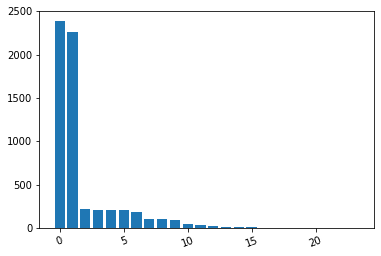

In [30]:
# what are scores for the features
calculate_scores(fs,X_train)

As seen above two features (0,2) which are Tumor Size and Reginol Node Positive are the most important features. But these 2 features seem to be very intuitive therefore we will drop these features to find the other most important ones.

In [31]:
#Lets drop tumore size and positive node
df_drop = df.drop(['Tumor Size','Reginol Node Positive'], axis = 1)

In [32]:
# recaclculate the best features
# prepare and divide the data to test and train
X_train, X_test, y_train, y_test = prepare_train_test (df_drop,'Status')

# fit the data to the feature selection model
X_train_fs, X_test_fs, fs = select_features(X_train, y_train,X_test)

                            Name       Score
0                 Grade_Grade II  214.257576
1   Progesterone Status_Positive  211.804549
2                     N Stage_N3  207.955114
3                 6th Stage_IIIC  207.955114
4         Marital Status_Married  187.234955
5          Marital Status_Single  108.514807
6                     Race_Other  107.430971
7       Estrogen Status_Positive   88.191899
8                  6th Stage_IIB   41.944090
9         Marital Status_Widowed   33.527331
10                    Race_White   28.625624
11                    T Stage_T3   12.378595
12        Regional Node Examined    7.516623
13              A Stage_Regional    6.258713
14      Marital Status_Separated    3.418715
15                6th Stage_IIIB    3.143297
16                    T Stage_T2    2.154724
17                6th Stage_IIIA    2.052712
18               Grade_Grade III    1.452563
19                    N Stage_N2    0.748842
20              Grade_anaplastic    0.243042
21        

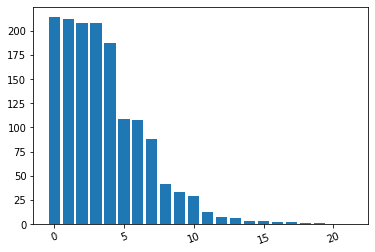

In [33]:
# what are scores for the features
calculate_scores(fs,X_train)

As seen above these features are the most important ones accroding to our KBest model:

    1- Grade_Grade II  
    2- Progesterone Status_Positive  
    3- N Stage_N3  
    4- 6th Stage_IIIC  
    5- Marital Status_Married  

As discoverd in data wrangling T stage,N satge and 6th stage had correlation with each other. Therefore we can just select either N Stage_N3, 6th Stage_IIIC and drop one. I will drop N Stage_N3.

In [34]:
#drop the N stage
df_drop = df_drop.drop(['N Stage_N3'], axis = 1)

In [35]:
# recaclculate the best features

# prepare and divide the data to test and train
X_train, X_test, y_train, y_test = prepare_train_test (df_drop,'Status')

# fit the data to the feature selection model
X_train_fs, X_test_fs, fs = select_features(X_train, y_train,X_test)


                            Name       Score
0                 Grade_Grade II  214.257576
1   Progesterone Status_Positive  211.804549
2                 6th Stage_IIIC  207.955114
3         Marital Status_Married  187.234955
4          Marital Status_Single  108.514807
5                     Race_Other  107.430971
6       Estrogen Status_Positive   88.191899
7                  6th Stage_IIB   41.944090
8         Marital Status_Widowed   33.527331
9                     Race_White   28.625624
10                    T Stage_T3   12.378595
11        Regional Node Examined    7.516623
12              A Stage_Regional    6.258713
13      Marital Status_Separated    3.418715
14                6th Stage_IIIB    3.143297
15                    T Stage_T2    2.154724
16                6th Stage_IIIA    2.052712
17               Grade_Grade III    1.452563
18                    N Stage_N2    0.748842
19              Grade_anaplastic    0.243042
20                    T Stage_T4    0.106607


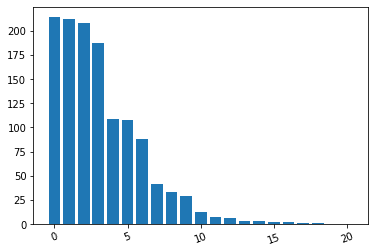

In [36]:
# what are scores for the features
calculate_scores(fs,X_train)

As seen above these features are the most important ones accroding to our new KBest model:

    1- Grade_Grade II 
    2- Progesterone Status_Positive
    3- 6th Stage_IIIC
    4- Marital Status_Married
    5- Marital Status_Single
    6- Race_Other
    7- Estrogen Status_Positive 